## Partie 1 : RNN avec numpy

In [1]:
# On importe les librairies nécessaires

import math
import numpy as np
import matplotlib.pyplot as plt

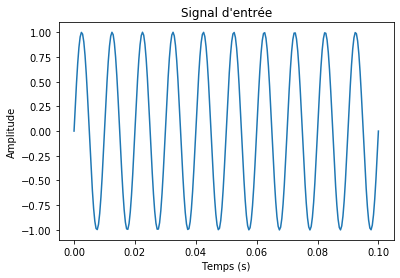

In [56]:
f0 = 100 #Hz
fe = 2500 #Hz

T = 0.1 #s
N = fe*T #nbr échantillons

t = np.linspace(0,T,N)
sinus = [np.sin(2*np.pi*f0*e) for e in t]

plt.plot(t,sinus)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title("Signal d'entrée")
plt.show()

In [57]:
# Q2) On explique les paramètres du modèle

# paramètres de la couche récurrente
Wh = np.array([[ 0.10044432],  [0.45918286], [-0.6911162],   [0.726187]  ])

Uh = np.array([[-0.23220539, -0.9194568,  -0.23070683,  0.21783987],
                 [-0.5916439,   0.2684203,   0.21439475,  0.7293442 ],
                 [ 0.5075546,  -0.25638738,  0.7739852,   0.27856922],
                 [-0.58174425, -0.12967375,  0.54932344, -0.58566386]])

bh = np.array([[0.], [0.], [0.], [0.]])

# paramètres de la couche connectée
Wy = np.array([0.55384743, -0.29551107, -0.07442117, 0.93942714])
Wy = np.reshape(Wy,(1,4))
by = np.array([0.])


In [69]:
# Q3) On écrit la passe avant pour la prédiction à partir du modèle donné

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# initialisation au temps 0

h = np.zeros((4,1))
x = np.array(sinus[0])
sinus_estime = [x]

# on boucle sur les temps 1 à 250
n = 249
# for i in range(n):
#     h = sigmoid(np.dot(Wh,x)+np.dot(Uh,h)+bh)
#     y = np.tanh(np.dot(Wy,h)+by)
#     x = y 
#     sinus_estime.append(y[0,0])

for i in range(n):
    h = sigmoid(np.dot(Wh,sinus[i])+np.dot(Uh,h)+bh)
    y = np.tanh(np.dot(Wy,h)+by)
    x = y 
    sinus_estime.append(y[0,0])

    

Erreur quadratique : 0.55


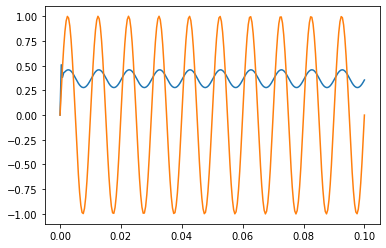

In [82]:
# Q4) Mesurer l'erreur et tracer 
plt.plot(t,sinus_estime, label="estimé")
plt.plot(t,sinus, label="sinus")

res = np.array(sinus_estime)-np.array(sinus)
res = res**2
quad_error = (1/len(res))*sum(res)
print('Erreur quadratique :', round(quad_error,2))

## Partie 2 : RNN avec Keras

In [ ]:
# On formate les données pour l'entrée du réseau RNN 

dataX = []
dataY = []
for i in range(len(x)-1):
    dataX.append([x[i]])
    dataY.append([x[i+1]])    
dataX = np.array(dataX)
dataY = np.array(dataY)
dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1], 1))


In [ ]:
# Q5) 

# on importe les librairies nécessaires
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

# On créé le réseau
# ...

# On compile le réseau
# ...

# on entraine le réseau
# ...


In [ ]:
# Q6 et Q7

# ...
